[[  0.         -22.96584479 -33.58609718 -37.85887386]
 [-24.02713226 -31.32466643 -35.95332943 -38.154229  ]
 [-36.77096408 -38.37096144 -38.97070202 -38.05688089]
 [-43.9374677  -43.0408536  -39.52555209 -27.18860512]
 [-47.13186807 -46.35659044 -44.92675086   0.        ]] 



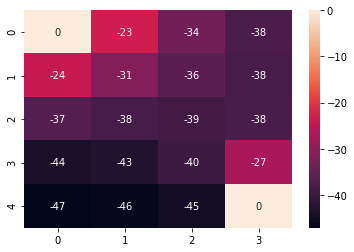

In [ ]:
import numpy as np
import seaborn as sns

iterations = 200
h = 5 #狀態高度
w = 4 #狀態寬度
length = h * w #向量長度
lamda_ = 1 #折扣率
value = [0 for i in range(length)] #迭代用的Array
state = [i for i in range(length)] #建立所有初始狀態
action = ['up', 'right', 'down', 'left'] #行動方向，上右下左
add_action = {'up': -w, 'right': 1, 'down': w, 'left': -1} #狀態邊界的數值換算


def reward(s): #除了左上跟右下為0，其他為-1獎勵
  return 0 if s in [0, length - 1] else -1

def limit_states(s, a): #加入限制條件，碰到四周邊界接回原本位置
  next_state = s
  if (s < w and a == 'up') or (s % (w - 1) == 0 and a == 'right' and s != 0)\
          or (s > length - w - 1 and a == 'down') or (s % w == 0 and a == 'left') :
      pass
  else:
      next_state = s + add_action[a]
  return next_state

def new_states_sa(s):
  index = []
  for a in action:
      next_ = limit_states(s, a) #依據行動取出位置（總共四個方向）
      index.append(next_)
  return index

for i in range(0,iterations):
  new_value = [0 for i in range(length)] 
  for s in state:
    value_new = 0
    if s in [0, length - 1]:
        pass
    else:
        new_states_sa_index = new_states_sa(s)
        rewards = reward(s)
        for x in new_states_sa_index:
            #建立1/4的機率 乘上獎勵+折扣率*新狀態
            value_new += 1.00 / len(action) * (rewards + lamda_ * value[x])
            new_value[s] = value_new
  value = new_value #複製一份回value

reshape_v = np.array(value).reshape(h, w) #調整向量
print(reshape_v, '\n')
sns.heatmap(reshape_v, annot=True)

In [ ]:
reward(1)

-1

In [ ]:
18 > length - w - 1

True

In [ ]:
new_states_sa(18)

[14, 18, 18, 17]